# **Dealing with missing data**

In [ ]:
!pip install scikit-learn pandas > /dev/null 2>&1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
# For outlier detection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score

In [ ]:
#read dataset
df = pd.read_csv('Billionaires Statistics Dataset.csv')
df

rank  finalWorth               category                personName   age  \
0        1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1        2      180000             Automotive                 Elon Musk  51.0   
2        3      114000             Technology                Jeff Bezos  59.0   
3        4      107000             Technology             Larry Ellison  78.0   
4        5      106000  Finance & Investments            Warren Buffett  92.0   
...    ...         ...                    ...                       ...   ...   
2635  2540        1000             Healthcare                   Yu Rong  51.0   
2636  2540        1000        Food & Beverage    Richard Yuengling, Jr.  80.0   
2637  2540        1000          Manufacturing             Zhang Gongyun  60.0   
2638  2540        1000            Real Estate    Zhang Guiping & family  71.0   
2639  2540        1000            Diversified               Inigo Zobel  66.0   

            country        city                        source  \
0            France       Paris                          LVMH   
1     United States      Austin                 Tesla, SpaceX   
2     United States      Medina                        Amazon   
3     United States       Lanai                        Oracle   
4     United States       Omaha            Berkshire Hathaway   
...             ...         ...                           ...   
2635          China    Shanghai                Health clinics   
2636  United States  Pottsville                          Beer   
2637          China       Gaomi  Tyre manufacturing machinery   
2638          China     Nanjing                   Real estate   
2639    Philippines      Makati                   Diversified   

                 industries countryOfCitizenship  ... cpi_change_country  \
0          Fashion & Retail               France  ...                1.1   
1                Automotive        United States  ...                7.5   
2                Technology        United States  ...                7.5   
3                Technology        United States  ...                7.5   
4     Finance & Investments        United States  ...                7.5   
...                     ...                  ...  ...                ...   
2635             Healthcare                China  ...                2.9   
2636        Food & Beverage        United States  ...                7.5   
2637          Manufacturing                China  ...                2.9   
2638            Real Estate                China  ...                2.9   
2639            Diversified          Philippines  ...                2.5   

               gdp_country gross_tertiary_education_enrollment  \
0      $2,715,518,274,227                                 65.6   
1     $21,427,700,000,000                                 88.2   
2     $21,427,700,000,000                                 88.2   
3     $21,427,700,000,000                                 88.2   
4     $21,427,700,000,000                                 88.2   
...                    ...                                 ...   
2635  $19,910,000,000,000                                 50.6   
2636  $21,427,700,000,000                                 88.2   
2637  $19,910,000,000,000                                 50.6   
2638  $19,910,000,000,000                                 50.6   
2639     $376,795,508,680                                 35.5   

     gross_primary_education_enrollment_country life_expectancy_country  \
0                                         102.5                    82.5   
1                                         101.8                    78.5   
2                                         101.8                    78.5   
3                                         101.8                    78.5   
4                                         101.8                    78.5   
...                                         ...                     ...   
2635                 

In [ ]:
## show the number of missing value of every column
missing_values = df.isna().sum()
missing_values
## I will take the column of age as an example below then

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [ ]:
# Find rows with missing values in the "age" column
rows_with_missing_age = df[df["age"].isna()]
# Display the rows with missing age
rows_with_missing_age

rank  finalWorth               category                   personName  \
107    108       15800       Fashion & Retail   Karl Albrecht Jr. & family   
108    108       15800       Fashion & Retail                Beate Heister   
247    246        8300  Finance & Investments  Francine von Finck & family   
550    534        5000            Real Estate             Zhu Yan & family   
554    552        4900             Technology              Marcos Galperin   
...    ...         ...                    ...                          ...   
2452  2405        1100  Finance & Investments               Christian Herz   
2453  2405        1100  Finance & Investments                Michaela Herz   
2550  2540        1000              Logistics               Chang Kuo-Ming   
2603  2540        1000          Manufacturing            Gabriella Meister   
2609  2540        1000       Fashion & Retail                 Réal Plourde   

      age      country               city              source  \
107   NaN      Germany                NaN        Supermarkets   
108   NaN          NaN                NaN        Supermarkets   
247   NaN  Switzerland            Thurgau         Investments   
550   NaN        China            Beijing         Real estate   
554   NaN    Argentina       Buenos Aires          E-commerce   
...   ...          ...                ...                 ...   
2452  NaN      Germany            Hamburg              Coffee   
2453  NaN      Germany            Hamburg              Coffee   
2550  NaN       Taiwan             Taipei      Transportation   
2603  NaN      Germany  Landsberg am Lech          Appliances   
2609  NaN       Canada          Westmount  Convenience stores   

                 industries countryOfCitizenship  ... cpi_change_country  \
107        Fashion & Retail              Germany  ...                1.4   
108        Fashion & Retail              Germany  ...                NaN   
247   Finance & Investments              Germany  ...                0.4   
550             Real Estate                China  ...                2.9   
554              Technology            Argentina  ...               53.5   
...                     ...                  ...  ...                ...   
2452  Finance & Investments              Germany  ...                1.4   
2453  Finance & Investments              Germany  ...                1.4   
2550              Logistics               Taiwan  ...                NaN   
2603          Manufacturing              Germany  ...                1.4   
2609       Fashion & Retail               Canada  ...                1.9   

               gdp_country gross_tertiary_education_enrollment  \
107    $3,845,630,030,824                                 70.2   
108                    NaN                                 NaN   
247      $703,082,435,360                                 59.6   
550   $19,910,000,000,000                                 50.6   
554      $449,663,446,954                                 90.0   
...                    ...                                 ...   
2452   $3,845,630,030,824                                 70.2   
2453   $3,845,630,030,824                                 70.2   
2550                   NaN                                 NaN   
2603   $3,845,630,030,824                                 70.2   
2609   $1,736,425,629,520                                 68.9   

     gross_primary_education_enrollment_country life_expectancy_country  \
107                                       104.0                    80.9   
108                                         NaN                     NaN   
247                                       105.2                    83.6   
550                                       100.2                    77.0   
554                                       109.7                    76.5   
...                                         ...                     ...   
2452                                      104.0          

**Delete**

In [ ]:
# 1. Removing the rows with missing data
##  for all columns (drops all rows contain NA)
df_cleaned = df.dropna()
print("(number of rows, number of columns): ",df_cleaned.shape)
# only 238 rows left

(number of rows, number of columns):  (238, 35)


In [ ]:
## for a sepcific column
df_cleaned_Age = df.dropna(subset="age") # rows with null dropped for platforms
#print("number of rows and columns after cleaning a specific column
print("(number of rows, number of columns): ",df_cleaned_Age.shape)
# 2575 rows left

(number of rows, number of columns):  (2575, 35)


In [ ]:
## 2. Remove the column
# delete the whole column if the feature not important
df_columns_cleaned = df.drop(columns="age")
print("(number of rows, number of columns): ",df_columns_cleaned.shape)
# 34 columns left

(number of rows, number of columns):  (2640, 34)


**Imputation**

numercial data


In [ ]:
#1. replacing with mean/median/mode (also can be seem as replaced by a fixed value)
##1.1mean
df_model_mean = df.copy() # avoid change the original data frame
mean_age = df_model_mean["age"].mean()
rounded_mean_age = round(mean_age) # round the mean into an integer since the age is showed as an integer in the dataset
df_model_mean["age"].fillna(rounded_mean_age, inplace=True)
missing_age_count0 = df["age"].isna().sum()
missing_age_count11 = df_model_mean["age"].isna().sum()
print("number of missing data under 'age' originally:", missing_age_count0)
print("number of missing data under 'age' after replacing:", missing_age_count11)
# column "age" contains no missing value after replace, it can be used to all numerical columns

number of missing data under 'age' originally: 65
number of missing data under 'age' after replacing: 0


In [ ]:
# verify
print("the mean of age is:", mean_age)
print("The rounded mean of age is",rounded_mean_age)
df_model_mean[df["age"].isna()].head()
#we can see the missing values are replace by the mean of age

the mean of age is: 65.14019417475728
The rounded mean of age is 65


rank  finalWorth               category                   personName  \
107   108       15800       Fashion & Retail   Karl Albrecht Jr. & family   
108   108       15800       Fashion & Retail                Beate Heister   
247   246        8300  Finance & Investments  Francine von Finck & family   
550   534        5000            Real Estate             Zhu Yan & family   
554   552        4900             Technology              Marcos Galperin   

      age      country          city        source             industries  \
107  65.0      Germany           NaN  Supermarkets       Fashion & Retail   
108  65.0          NaN           NaN  Supermarkets       Fashion & Retail   
247  65.0  Switzerland       Thurgau   Investments  Finance & Investments   
550  65.0        China       Beijing   Real estate            Real Estate   
554  65.0    Argentina  Buenos Aires    E-commerce             Technology   

    countryOfCitizenship  ... cpi_change_country           gdp_country  \
107              Germany  ...                1.4   $3,845,630,030,824    
108              Germany  ...                NaN                   NaN   
247              Germany  ...                0.4     $703,082,435,360    
550                China  ...                2.9  $19,910,000,000,000    
554            Argentina  ...               53.5     $449,663,446,954    

    gross_tertiary_education_enrollment  \
107                                70.2   
108                                 NaN   
247                                59.6   
550                                50.6   
554                                90.0   

    gross_primary_education_enrollment_country life_expectancy_country  \
107                                      104.0                    80.9   
108                                        NaN                     NaN   
247                                      105.2                    83.6   
550                                      100.2                    77.0   
554                                      109.7                    76.5   

    tax_revenue_country_country total_tax_rate_country population_country  \
107                        11.5                   48.8       8.313280e+07   
108                         NaN                    NaN                NaN   
247                        10.1                   28.8       8.574832e+06   
550                         9.4                   59.2       1.397715e+09   
554                        10.1                  106.3       4.493871e+07   

    latitude_country longitude_country  
107        51.165691         10.451526  
108              NaN               NaN  
247        46.818188          8.227512  
550        35.861660        104.195397  
554       -38.416097        -63.616672  

[5 rows x 35 columns]

In [ ]:
## 1.2 median
df_model_median = df.copy() # avoid change the original data frame
median_age = df_model_median["age"].median()
df_model_median["age"].fillna(median_age, inplace=True)# fill in median
missing_age_count20 = df["age"].isna().sum()
missing_age_count21 = df_model_median["age"].isna().sum()
print("number of missing data under 'age' originally:", missing_age_count20)
print("number of missing data under 'age' after replacing:", missing_age_count21)
# column "age" contains no missing value

number of missing data under 'age' originally: 65
number of missing data under 'age' after replacing: 0


In [ ]:
# verify
print("The median of age is",median_age)
df_model_median[df["age"].isna()].head() ## we can see the missing values are replace by the median of age

The median of age is 65.0


rank  finalWorth               category                   personName  \
107   108       15800       Fashion & Retail   Karl Albrecht Jr. & family   
108   108       15800       Fashion & Retail                Beate Heister   
247   246        8300  Finance & Investments  Francine von Finck & family   
550   534        5000            Real Estate             Zhu Yan & family   
554   552        4900             Technology              Marcos Galperin   

      age      country          city        source             industries  \
107  65.0      Germany           NaN  Supermarkets       Fashion & Retail   
108  65.0          NaN           NaN  Supermarkets       Fashion & Retail   
247  65.0  Switzerland       Thurgau   Investments  Finance & Investments   
550  65.0        China       Beijing   Real estate            Real Estate   
554  65.0    Argentina  Buenos Aires    E-commerce             Technology   

    countryOfCitizenship  ... cpi_change_country           gdp_country  \
107              Germany  ...                1.4   $3,845,630,030,824    
108              Germany  ...                NaN                   NaN   
247              Germany  ...                0.4     $703,082,435,360    
550                China  ...                2.9  $19,910,000,000,000    
554            Argentina  ...               53.5     $449,663,446,954    

    gross_tertiary_education_enrollment  \
107                                70.2   
108                                 NaN   
247                                59.6   
550                                50.6   
554                                90.0   

    gross_primary_education_enrollment_country life_expectancy_country  \
107                                      104.0                    80.9   
108                                        NaN                     NaN   
247                                      105.2                    83.6   
550                                      100.2                    77.0   
554                                      109.7                    76.5   

    tax_revenue_country_country total_tax_rate_country population_country  \
107                        11.5                   48.8       8.313280e+07   
108                         NaN                    NaN                NaN   
247                        10.1                   28.8       8.574832e+06   
550                         9.4                   59.2       1.397715e+09   
554                        10.1                  106.3       4.493871e+07   

    latitude_country longitude_country  
107        51.165691         10.451526  
108              NaN               NaN  
247        46.818188          8.227512  
550        35.861660        104.195397  
554       -38.416097        -63.616672  

[5 rows x 35 columns]

In [ ]:
## 1.3 mode
df_model_mode = df.copy()
mode_age = df_model_mode["age"].mode()[0] # find mode
df_model_mode["age"].fillna(mode_age, inplace=True) # fill in
missing_age_count30 = df["age"].isna().sum()
missing_age_count31 = df_model_mode["age"].isna().sum()

In [ ]:
# verify
print("# of missing data under 'age' originally:", missing_age_count30)
print("# of missing data under 'age' after replacing:", missing_age_count31)
print("The mode of age is", mode_age)
df_model_mode[df["age"].isna()].head() ## we can see the missing values are replace by the mode of age

# of missing data under 'age' originally: 65
# of missing data under 'age' after replacing: 0
The mode of age is 60.0


rank  finalWorth               category                   personName  \
107   108       15800       Fashion & Retail   Karl Albrecht Jr. & family   
108   108       15800       Fashion & Retail                Beate Heister   
247   246        8300  Finance & Investments  Francine von Finck & family   
550   534        5000            Real Estate             Zhu Yan & family   
554   552        4900             Technology              Marcos Galperin   

      age      country          city        source             industries  \
107  60.0      Germany           NaN  Supermarkets       Fashion & Retail   
108  60.0          NaN           NaN  Supermarkets       Fashion & Retail   
247  60.0  Switzerland       Thurgau   Investments  Finance & Investments   
550  60.0        China       Beijing   Real estate            Real Estate   
554  60.0    Argentina  Buenos Aires    E-commerce             Technology   

    countryOfCitizenship  ... cpi_change_country           gdp_country  \
107              Germany  ...                1.4   $3,845,630,030,824    
108              Germany  ...                NaN                   NaN   
247              Germany  ...                0.4     $703,082,435,360    
550                China  ...                2.9  $19,910,000,000,000    
554            Argentina  ...               53.5     $449,663,446,954    

    gross_tertiary_education_enrollment  \
107                                70.2   
108                                 NaN   
247                                59.6   
550                                50.6   
554                                90.0   

    gross_primary_education_enrollment_country life_expectancy_country  \
107                                      104.0                    80.9   
108                                        NaN                     NaN   
247                                      105.2                    83.6   
550                                      100.2                    77.0   
554                                      109.7                    76.5   

    tax_revenue_country_country total_tax_rate_country population_country  \
107                        11.5                   48.8       8.313280e+07   
108                         NaN                    NaN                NaN   
247                        10.1                   28.8       8.574832e+06   
550                         9.4                   59.2       1.397715e+09   
554                        10.1                  106.3       4.493871e+07   

    latitude_country longitude_country  
107        51.165691         10.451526  
108              NaN               NaN  
247        46.818188          8.227512  
550        35.861660        104.195397  
554       -38.416097        -63.616672  

[5 rows x 35 columns]

In [ ]:
# 2. regression replacing
## just for an example
## I choose "age" be the target predictor,
## "life_expectancy_country", and "population_country" be the predictor variables to predict the missing value of "age"
df_model_regression = df.copy()
## here I replace the missing data in predictor varibales as their mean just for example
mean_life = df_model_regression["life_expectancy_country"].mean()
df_model_regression["life_expectancy_country"].fillna(mean_life, inplace=True)
mean_population = df_model_regression["population_country"].mean()
df_model_regression["population_country"].fillna(mean_life, inplace=True)
## full data without missing value for fit a regression model
# predictors except missing age
full_predictors = df_model_regression[df["age"].notna()][["life_expectancy_country", "population_country"]]
# target except missing value
full_target =  df_model_regression[df["age"].notna()]["age"]
## predicters for the rows  containing missing "age"
# predictors with missing age
missing_predictors = df_model_regression[df["age"].isna()][["life_expectancy_country", "population_country"]]

In [ ]:
# build a Regression Model:
X = full_predictors
y = full_target
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
## predict the missing value
predicted_missing_values = model.predict(missing_predictors) # predicted age for the missing values
## round the predicted age to an integer
rounded_predicted_missing_values = [round(predicted_missing_values) for predicted_missing_values in predicted_missing_values]
## **  we need to assess the performance of the regression model to ensure the imputed values are reasonable,
##     but what we discuss here is dealing with missing data in cleaning precedure, so I ignore the assessing and adjusting precedure.(too much methods)
##     (only fouced on showing the method of replacing missing data with regression model prediction)

In [ ]:
# impute the data
missing_age = df_model_regression["age"].isna()
df_model_regression.loc[missing_age, "age"] = rounded_predicted_missing_values
df_model_regression[df["age"].isna()]

rank  finalWorth               category                   personName  \
107    108       15800       Fashion & Retail   Karl Albrecht Jr. & family   
108    108       15800       Fashion & Retail                Beate Heister   
247    246        8300  Finance & Investments  Francine von Finck & family   
550    534        5000            Real Estate             Zhu Yan & family   
554    552        4900             Technology              Marcos Galperin   
...    ...         ...                    ...                          ...   
2452  2405        1100  Finance & Investments               Christian Herz   
2453  2405        1100  Finance & Investments                Michaela Herz   
2550  2540        1000              Logistics               Chang Kuo-Ming   
2603  2540        1000          Manufacturing            Gabriella Meister   
2609  2540        1000       Fashion & Retail                 Réal Plourde   

       age      country               city              source  \
107   66.0      Germany                NaN        Supermarkets   
108   68.0          NaN                NaN        Supermarkets   
247   66.0  Switzerland            Thurgau         Investments   
550   61.0        China            Beijing         Real estate   
554   68.0    Argentina       Buenos Aires          E-commerce   
...    ...          ...                ...                 ...   
2452  66.0      Germany            Hamburg              Coffee   
2453  66.0      Germany            Hamburg              Coffee   
2550  68.0       Taiwan             Taipei      Transportation   
2603  66.0      Germany  Landsberg am Lech          Appliances   
2609  66.0       Canada          Westmount  Convenience stores   

                 industries countryOfCitizenship  ... cpi_change_country  \
107        Fashion & Retail              Germany  ...                1.4   
108        Fashion & Retail              Germany  ...                NaN   
247   Finance & Investments              Germany  ...                0.4   
550             Real Estate                China  ...                2.9   
554              Technology            Argentina  ...               53.5   
...                     ...                  ...  ...                ...   
2452  Finance & Investments              Germany  ...                1.4   
2453  Finance & Investments              Germany  ...                1.4   
2550              Logistics               Taiwan  ...                NaN   
2603          Manufacturing              Germany  ...                1.4   
2609       Fashion & Retail               Canada  ...                1.9   

               gdp_country gross_tertiary_education_enrollment  \
107    $3,845,630,030,824                                 70.2   
108                    NaN                                 NaN   
247      $703,082,435,360                                 59.6   
550   $19,910,000,000,000                                 50.6   
554      $449,663,446,954                                 90.0   
...                    ...                                 ...   
2452   $3,845,630,030,824                                 70.2   
2453   $3,845,630,030,824                                 70.2   
2550                   NaN                                 NaN   
2603   $3,845,630,030,824                                 70.2   
2609   $1,736,425,629,520                                 68.9   

     gross_primary_education_enrollment_country life_expectancy_country  \
107                                       104.0               80.900000   
108                                         NaN               78.122823   
247                                       105.2               83.600000   
550                                       100.2               77.000000   
554                                       109.7               76.500000   
...                                         ...                     ...   
2452                                      104

In [ ]:
## verify
print("number of missing data under 'age':", missing_age_count0)
print("number of missing data under 'age' after replacing:",df_model_regression["age"].isna().sum())
print("predicted data of the missing value (first 5): ",rounded_predicted_missing_values[0:5])
df_model_regression[df["age"].isna()].head()

number of missing data under 'age': 65
number of missing data under 'age' after replacing: 0
predicted data of the missing value (first 5):  [66, 68, 66, 61, 68]


rank  finalWorth               category                   personName  \
107   108       15800       Fashion & Retail   Karl Albrecht Jr. & family   
108   108       15800       Fashion & Retail                Beate Heister   
247   246        8300  Finance & Investments  Francine von Finck & family   
550   534        5000            Real Estate             Zhu Yan & family   
554   552        4900             Technology              Marcos Galperin   

      age      country          city        source             industries  \
107  66.0      Germany           NaN  Supermarkets       Fashion & Retail   
108  68.0          NaN           NaN  Supermarkets       Fashion & Retail   
247  66.0  Switzerland       Thurgau   Investments  Finance & Investments   
550  61.0        China       Beijing   Real estate            Real Estate   
554  68.0    Argentina  Buenos Aires    E-commerce             Technology   

    countryOfCitizenship  ... cpi_change_country           gdp_country  \
107              Germany  ...                1.4   $3,845,630,030,824    
108              Germany  ...                NaN                   NaN   
247              Germany  ...                0.4     $703,082,435,360    
550                China  ...                2.9  $19,910,000,000,000    
554            Argentina  ...               53.5     $449,663,446,954    

    gross_tertiary_education_enrollment  \
107                                70.2   
108                                 NaN   
247                                59.6   
550                                50.6   
554                                90.0   

    gross_primary_education_enrollment_country life_expectancy_country  \
107                                      104.0               80.900000   
108                                        NaN               78.122823   
247                                      105.2               83.600000   
550                                      100.2               77.000000   
554                                      109.7               76.500000   

    tax_revenue_country_country total_tax_rate_country population_country  \
107                        11.5                   48.8       8.313280e+07   
108                         NaN                    NaN       7.812282e+01   
247                        10.1                   28.8       8.574832e+06   
550                         9.4                   59.2       1.397715e+09   
554                        10.1                  106.3       4.493871e+07   

    latitude_country longitude_country  
107        51.165691         10.451526  
108              NaN               NaN  
247        46.818188          8.227512  
550        35.861660        104.195397  
554       -38.416097        -63.616672  

[5 rows x 35 columns]

In [ ]:
# 3. machine learning-based imputation methods such as K-nearest neighbors (KNN), decision trees.
## 3.1 KNN
df_model_KNN = df.copy()
##impute missing for life_expectancy_country,population_country
## here I replace the missing data in predictor varibales as their mean just for example
mean_life = df_model_KNN["life_expectancy_country"].mean()
df_model_KNN["life_expectancy_country"].fillna(mean_life, inplace=True)
mean_population = df_model_KNN["population_country"].mean()
df_model_KNN["population_country"].fillna(mean_life, inplace=True)
## fit the imputer
imputer = KNNImputer(n_neighbors = 100,  weights="uniform", metric="nan_euclidean") # We can adjust the number of neighbors as needed
imputed_values = imputer.fit_transform(df_model_KNN[['age','life_expectancy_country','population_country']]) #I select life_expectancy_country, and population_country are related to age (add other numbercial features are also ok)
## life_expectancy_country, population_country can also get from the row of code above.
rounded_imputed_age = np.round(imputed_values[:,0]) # only fill the missing value of ages, rounded since integer
# impute missing ages
df_model_KNN["age"] = rounded_imputed_age

In [ ]:
## verify
df_model_KNN[df["age"].isna()].head()

rank  finalWorth               category                   personName  \
107   108       15800       Fashion & Retail   Karl Albrecht Jr. & family   
108   108       15800       Fashion & Retail                Beate Heister   
247   246        8300  Finance & Investments  Francine von Finck & family   
550   534        5000            Real Estate             Zhu Yan & family   
554   552        4900             Technology              Marcos Galperin   

      age      country          city        source             industries  \
107  65.0      Germany           NaN  Supermarkets       Fashion & Retail   
108  65.0          NaN           NaN  Supermarkets       Fashion & Retail   
247  66.0  Switzerland       Thurgau   Investments  Finance & Investments   
550  60.0        China       Beijing   Real estate            Real Estate   
554  67.0    Argentina  Buenos Aires    E-commerce             Technology   

    countryOfCitizenship  ... cpi_change_country           gdp_country  \
107              Germany  ...                1.4   $3,845,630,030,824    
108              Germany  ...                NaN                   NaN   
247              Germany  ...                0.4     $703,082,435,360    
550                China  ...                2.9  $19,910,000,000,000    
554            Argentina  ...               53.5     $449,663,446,954    

    gross_tertiary_education_enrollment  \
107                                70.2   
108                                 NaN   
247                                59.6   
550                                50.6   
554                                90.0   

    gross_primary_education_enrollment_country life_expectancy_country  \
107                                      104.0                    80.9   
108                                        NaN                     NaN   
247                                      105.2                    83.6   
550                                      100.2                    77.0   
554                                      109.7                    76.5   

    tax_revenue_country_country total_tax_rate_country population_country  \
107                        11.5                   48.8       8.313280e+07   
108                         NaN                    NaN                NaN   
247                        10.1                   28.8       8.574832e+06   
550                         9.4                   59.2       1.397715e+09   
554                        10.1                  106.3       4.493871e+07   

    latitude_country longitude_country  
107        51.165691         10.451526  
108              NaN               NaN  
247        46.818188          8.227512  
550        35.861660        104.195397  
554       -38.416097        -63.616672  

[5 rows x 35 columns]

In [ ]:
## 3.2 decision tree
df_model_DT = df.copy()
## for example, we fill the missing values of life_expectancy_country, and population_country with their mean
df_model_DT['life_expectancy_country'].fillna(df_model_DT['life_expectancy_country'].mean(), inplace=True)
df_model_DT['population_country'].fillna(df_model_DT['population_country'].mean(), inplace=True)
#Separate data into two sets: one with missing values and one without
df_missing = df_model_DT[df_model_DT["age"].isna()]
df_not_missing = df_model_DT[df_model_DT["age"].notna()]
#Create a decision tree regressor
tree = DecisionTreeRegressor()
# Fit the decision tree on data without missing values
tree.fit(df_not_missing[['life_expectancy_country','population_country']], df_not_missing['age'])
# Predict missing values
imputed_values = tree.predict(df_missing[['life_expectancy_country','population_country']])
# round to integers
rounded_imputed_age = np.round(imputed_values)
# impute the values
missing_age1 = df_model_DT["age"].isna()
df_model_DT.loc[missing_age1, "age"] = rounded_imputed_age

In [ ]:
df_model_DT[df["age"].isna()].head()

rank  finalWorth               category                   personName  \
107   108       15800       Fashion & Retail   Karl Albrecht Jr. & family   
108   108       15800       Fashion & Retail                Beate Heister   
247   246        8300  Finance & Investments  Francine von Finck & family   
550   534        5000            Real Estate             Zhu Yan & family   
554   552        4900             Technology              Marcos Galperin   

      age      country          city        source             industries  \
107  65.0      Germany           NaN  Supermarkets       Fashion & Retail   
108  69.0          NaN           NaN  Supermarkets       Fashion & Retail   
247  66.0  Switzerland       Thurgau   Investments  Finance & Investments   
550  59.0        China       Beijing   Real estate            Real Estate   
554  84.0    Argentina  Buenos Aires    E-commerce             Technology   

    countryOfCitizenship  ... cpi_change_country           gdp_country  \
107              Germany  ...                1.4   $3,845,630,030,824    
108              Germany  ...                NaN                   NaN   
247              Germany  ...                0.4     $703,082,435,360    
550                China  ...                2.9  $19,910,000,000,000    
554            Argentina  ...               53.5     $449,663,446,954    

    gross_tertiary_education_enrollment  \
107                                70.2   
108                                 NaN   
247                                59.6   
550                                50.6   
554                                90.0   

    gross_primary_education_enrollment_country life_expectancy_country  \
107                                      104.0               80.900000   
108                                        NaN               78.122823   
247                                      105.2               83.600000   
550                                      100.2               77.000000   
554                                      109.7               76.500000   

    tax_revenue_country_country total_tax_rate_country population_country  \
107                        11.5                   48.8       8.313280e+07   
108                         NaN                    NaN       5.102053e+08   
247                        10.1                   28.8       8.574832e+06   
550                         9.4                   59.2       1.397715e+09   
554                        10.1                  106.3       4.493871e+07   

    latitude_country longitude_country  
107        51.165691         10.451526  
108              NaN               NaN  
247        46.818188          8.227512  
550        35.861660        104.195397  
554       -38.416097        -63.616672  

[5 rows x 35 columns]

whether finalWorth sorted decreasing: True
[69.05, 67.3265306122449, 65.84848484848484, 66.82, 68.59, 67.70408163265306, 66.12, 67.32323232323232, 64.83838383838383, 67.74489795918367, 66.27835051546391, 63.88659793814433, 67.21428571428571, 65.92708333333333, 63.649484536082475, 63.371134020618555, 66.29166666666667, 63.63265306122449, 63.37755102040816, 64.58333333333333, 64.27368421052631, 62.84848484848485, 61.94736842105263, 61.78947368421053, 62.26881720430107, 61.38383838383838, 62.578947368421055]


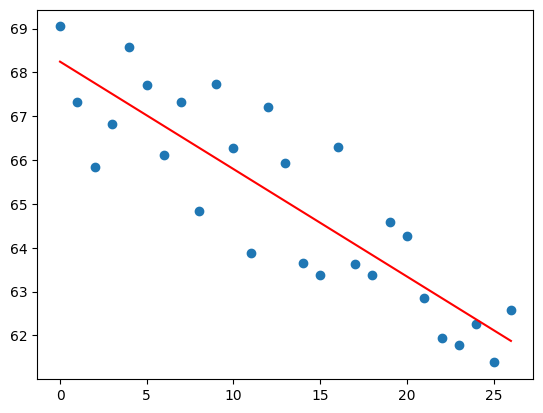

In [ ]:
# 4. Linear Interpolation
df_interpolation = df.copy()
# by observaing final wealth is sorted decresing
is_sorted_ascending = df['finalWorth'].is_monotonic_decreasing # test whether it's decreasing sorted
print("whether finalWorth sorted decreasing:", is_sorted_ascending)
# by common sense, people have more wealth sometimes with the increase of age
# I would test the trend as well
# Since there are too much values, points plot is mass, so I pick the mean of every 100 values to test the general trend of the data
chunk_size = 100
# Create an empty list to store the means
means = []
# Iterate through the column in chunks of 100 values
for i in range(0, len(df_interpolation['age']), chunk_size):
    chunk = df_interpolation['age'].iloc[i:i + chunk_size]
    chunk_mean = chunk.mean()
    means.append(chunk_mean)
# Now, 'means' contains the mean of every 100 values in the column
print(means)
# the range of finalWealth to too large, so I use order of ages as X-axis, just to observe the trend
# 27 is the number of the list of means
plt.scatter(range(0,27), means, label='Data Points')
coefficients = np.polyfit(range(0,27), means, 1)
line = np.poly1d(coefficients)
plt.plot(range(0,27), line(range(0,27)), color='red', label='Linear Regression Line')
## we can see there is a decreasing trend for the age with the decrerase of finalWealth

In [ ]:
# impute values
df_interpolation['age'] = df_interpolation['age'].interpolate(method='linear').round()
#verify
df_interpolation[df["age"].isna()].head() #filled by the linear interpolation

rank  finalWorth               category                   personName  \
107   108       15800       Fashion & Retail   Karl Albrecht Jr. & family   
108   108       15800       Fashion & Retail                Beate Heister   
247   246        8300  Finance & Investments  Francine von Finck & family   
550   534        5000            Real Estate             Zhu Yan & family   
554   552        4900             Technology              Marcos Galperin   

      age      country          city        source             industries  \
107  72.0      Germany           NaN  Supermarkets       Fashion & Retail   
108  78.0          NaN           NaN  Supermarkets       Fashion & Retail   
247  78.0  Switzerland       Thurgau   Investments  Finance & Investments   
550  72.0        China       Beijing   Real estate            Real Estate   
554  81.0    Argentina  Buenos Aires    E-commerce             Technology   

    countryOfCitizenship  ... cpi_change_country           gdp_country  \
107              Germany  ...                1.4   $3,845,630,030,824    
108              Germany  ...                NaN                   NaN   
247              Germany  ...                0.4     $703,082,435,360    
550                China  ...                2.9  $19,910,000,000,000    
554            Argentina  ...               53.5     $449,663,446,954    

    gross_tertiary_education_enrollment  \
107                                70.2   
108                                 NaN   
247                                59.6   
550                                50.6   
554                                90.0   

    gross_primary_education_enrollment_country life_expectancy_country  \
107                                      104.0                    80.9   
108                                        NaN                     NaN   
247                                      105.2                    83.6   
550                                      100.2                    77.0   
554                                      109.7                    76.5   

    tax_revenue_country_country total_tax_rate_country population_country  \
107                        11.5                   48.8       8.313280e+07   
108                         NaN                    NaN                NaN   
247                        10.1                   28.8       8.574832e+06   
550                         9.4                   59.2       1.397715e+09   
554                        10.1                  106.3       4.493871e+07   

    latitude_country longitude_country  
107        51.165691         10.451526  
108              NaN               NaN  
247        46.818188          8.227512  
550        35.861660        104.195397  
554       -38.416097        -63.616672  

[5 rows x 35 columns]

# **Outlier Detection Algorithms**

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='Boston-house-price-data', version=1, parser="auto")
# dataset

In [ ]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

# 1. Isolation Forests for Outlier Detection

In [ ]:
# Use Isolation Forest to identify anomalies in the training data
clf = IsolationForest(contamination=0.1, random_state=0)
clf.fit(df)
label_clf = clf.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
num_inliers_clf = np.sum(label_clf == 1)
num_outliers_clf = np.sum(label_clf == -1)

print(f"Number of inliers: {num_inliers_clf}")
print(f"Number of outliers: {num_outliers_clf}")

Number of inliers: 455
Number of outliers: 51


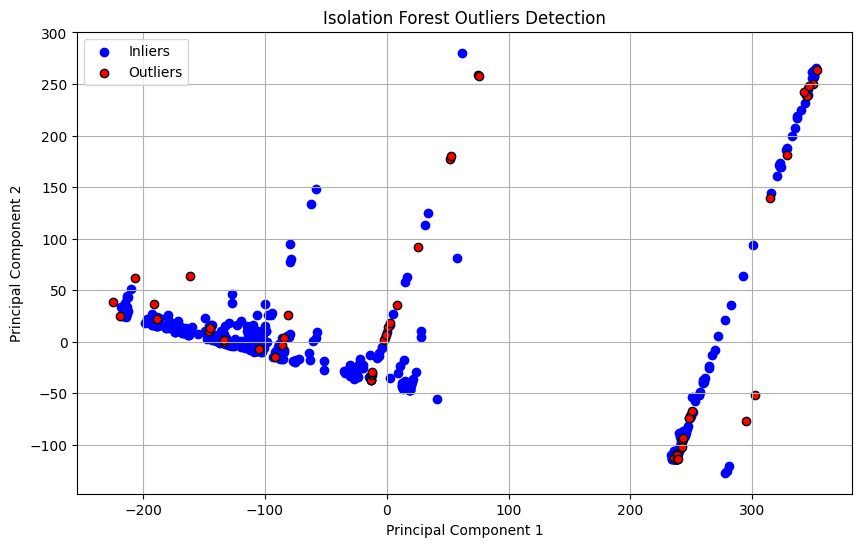

In [ ]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[label_clf == 1][:, 0], df_pca[label_clf == 1][:, 1], c='blue', label='Inliers')
plt.scatter(df_pca[label_clf == -1][:, 0], df_pca[label_clf == -1][:, 1], c='red', label='Outliers', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Isolation Forest Outliers Detection')
plt.legend()
plt.grid(True)
plt.show()

# 2. Local Outlier Factor for Outlier Detection

In [ ]:
# 1. Apply the LOF algorithm
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
label_lof = lof.fit_predict(df)  # Fit the model to the data

In [ ]:
num_inliers_lof = np.sum(label_lof == 1)
num_outliers_lof = np.sum(label_lof == -1)

print(f"Number of inliers: {num_inliers_lof}")
print(f"Number of outliers: {num_outliers_lof}")

Number of inliers: 455
Number of outliers: 51


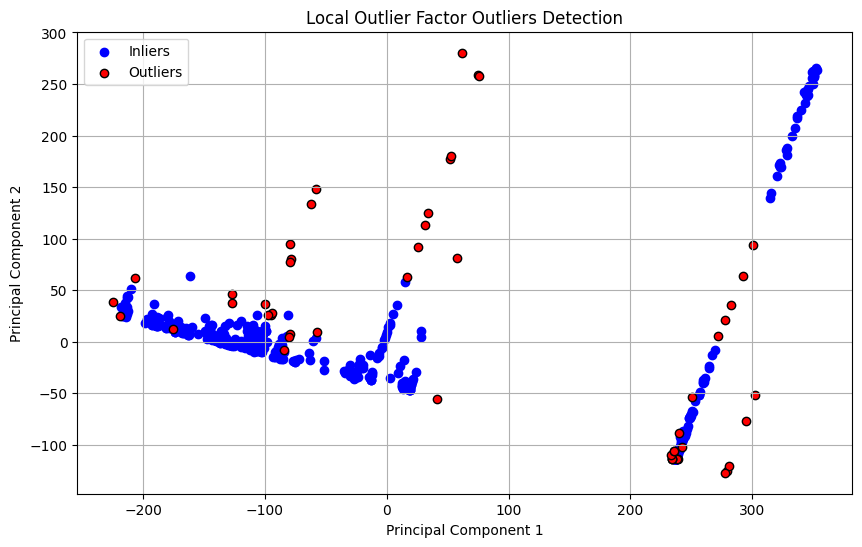

In [ ]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[label_lof == 1][:, 0], df_pca[label_lof == 1][:, 1], c='blue', label='Inliers')
plt.scatter(df_pca[label_lof == -1][:, 0], df_pca[label_lof == -1][:, 1], c='red', label='Outliers', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Local Outlier Factor Outliers Detection')
plt.legend()
plt.grid(True)
plt.show()

# **Anomaly/Novelty Detection**#

In [ ]:
data = pd.read_csv('creditcard.csv')
data.head()
#Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
#Amount: Transaction amount
#V1, V2, ... V28 is the Principal components obtained from PCA. These are the main vectors that result from the PCA transformation, representing the maximum variance directions in the original data

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
#set up =colomns except class as feature data, class as target
X = data.drop('Class', axis=1)
y = data['Class']
#standardize the input data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
# Split dataset as 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=0)

In [ ]:
#colomn name has been removed after standarization, add them back as X_test1 for graph
X_test1 = pd.DataFrame(X_test, columns = ["Time",'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
           'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
           'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',"Amount"])

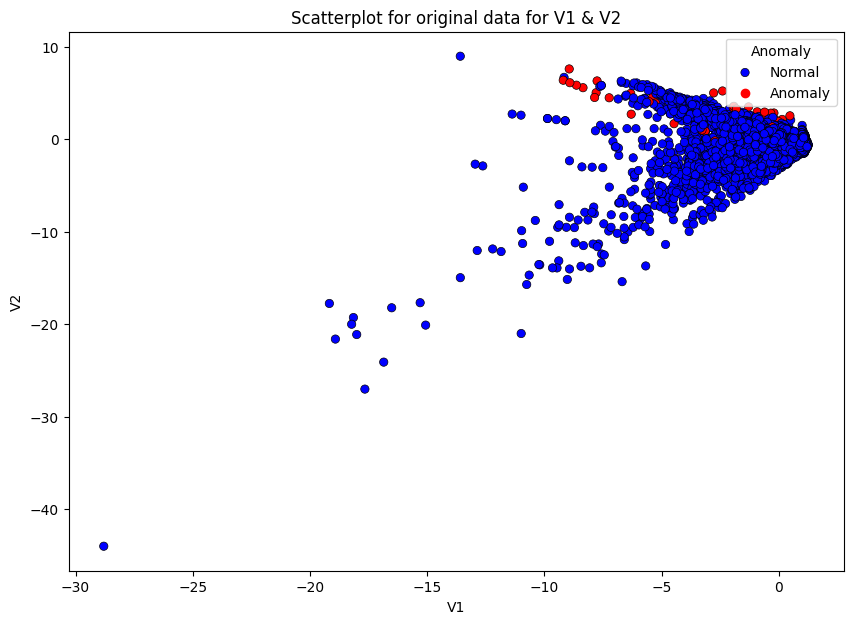

In [ ]:
#Scatterplot for orignal data for V1 & V2 in order to further compare with the algorithms I used.
#Invert the labels because Seaborn will create the legend based on the order of unique values in the hue data.
y_invert = [-i for i in y_test]

plt.figure(figsize=(10, 7))

sns.scatterplot(x=X_test1["V1"], y=X_test1["V2"], hue=y_invert, palette={0: 'blue', -1: 'red'}, edgecolor='k')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Scatterplot for original data for V1 & V2')
plt.legend(title='Anomaly', labels=["Normal",'Anomaly'])
plt.show()

### **Anomaly detection: Random Forest Classifier(supervised)**

In [ ]:
#fit the model
rf = RandomForestClassifier(n_estimators = 100,random_state=0)
rf.fit(X_train, y_train)
#predit the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy is: {}%'.format(accuracy_score(y_test,y_pred)*100))
print('AUC score is: {}%'.format(roc_auc_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56854     7]
 [   22    79]]
Accuracy is: 99.94908886626172%
AUC score is: 89.1027555297694%


With 6mins execution time

True Positives: 56,854 - Actual normal transactions predicted as normal.

False Positives: 7 - Actual normal transactions predicted as anomalous.

False Negatives: 22 - Actual anomalous transactions predicted as normal.

True Negatives: 79 - Actual anomalous transactions predicted as anomalous

With 100% F1 on normal detection and F1 score 84% on anomoly detection and overall 99.94% is really rubust.
With 89% AUC score suggests that this model has a good trade-off between True Positive Rate and False Positive Rate.

The reason for that Random forest usually performs well on highly imbalanced dataset like my dataset.

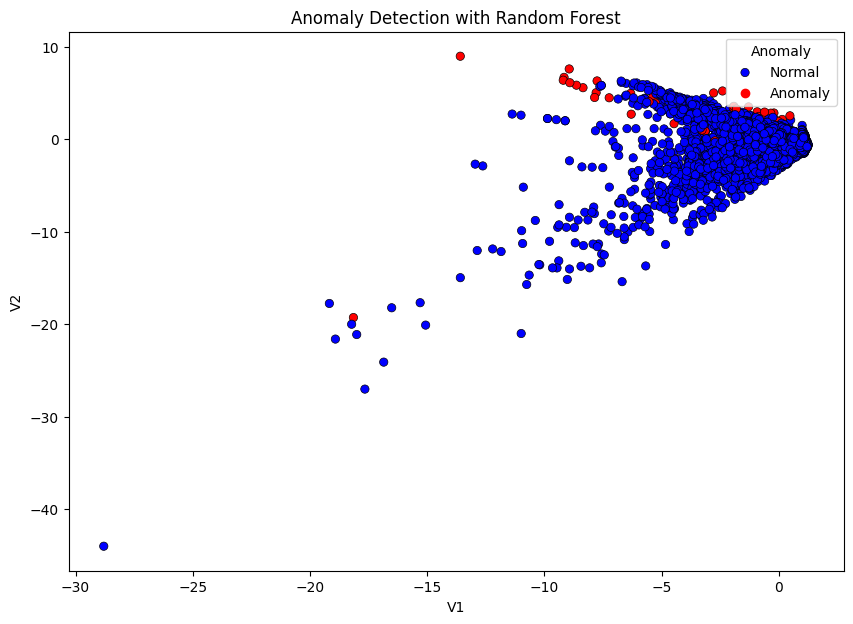

In [ ]:
#Visualization using V1 and V2 for the 2D plane
#Invert the labels because Seaborn will create the legend based on the order of unique values in the hue data.
y_pred_invert = [-i for i in y_pred]
plt.figure(figsize=(10, 7))

sns.scatterplot(x=X_test1["V1"], y=X_test1["V2"], hue=y_pred_invert, palette={0: 'blue', -1: 'red'}, edgecolor='black')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Anomaly Detection with Random Forest')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

There are regions, particularly around the -20 to -15 range on the x-axis, where both blue and red points overlap. This overlap suggests that there are transactions that the model is unsure about and might be prone to false positives or false negatives.
Overall the model is really strong compare to original one.

In [ ]:
#clean outlier identified with
outliers = y_pred == -1

# Filter the data
X_test_cleaned = X_test[outliers]
y_test_cleaned = y_test[outliers]

## **Anomaly detection: Isolation Forest(Unsupervised)**

In [ ]:
#Fit model
iso_forest = IsolationForest(contamination=0.0017) # Contamination: sum(data['Class']) / len(data)
iso_forest.fit(X_train)

# Predict anomalies
y_pred_iso= iso_forest.predict(X_test)

#transformation as -1 represents an anomaly,1 represents a normal data point IsolationForest
y_pred_iso = [1 if pred == -1 else 0 for pred in y_pred_iso]

# Evaluate the model
print(classification_report(y_test, y_pred_iso))
print(confusion_matrix(y_test, y_pred_iso))
print('Accuracy is: {}%'.format(accuracy_score(y_test,y_pred_iso)*100))
print('AUC score is: {}%'.format(roc_auc_score(y_test, y_pred_iso)*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.30      0.29      0.29       101

    accuracy                           1.00     56962
   macro avg       0.65      0.64      0.65     56962
weighted avg       1.00      1.00      1.00     56962

[[56792    69]
 [   72    29]]
Accuracy is: 99.7524665566518%
AUC score is: 64.29576136769865%


True Positives: 56,795 - Actual normal transactions predicted as normal.

False Positives: 66 - Actual normal transactions predicted as anomalous.

False Negatives: 79 - Actual anomalous transactions predicted as normal.

True Negatives: 22 - Actual anomalous transactions predicted as anomalous.

With 99.74 accuracy overrall.
An AUC of 64.30% is moderate, suggesting that Isolation Forest model provides some ability to distinguish between the two classes, but it's not highly effective for this dataset.

Considering that there were only 101 actual anomalies, detecting 22 of them is significant.

However, there's room for improvement, given that 79 were missed.


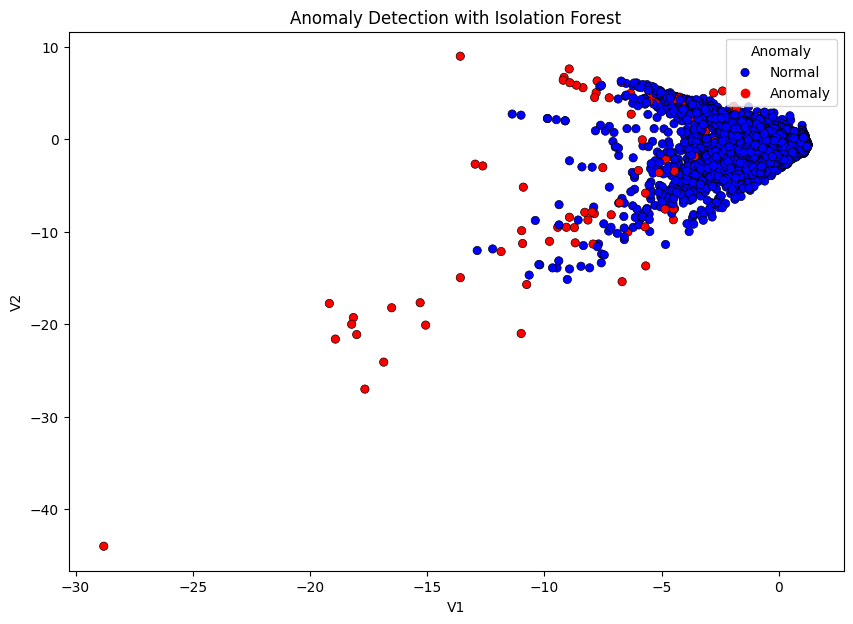

In [ ]:
#Visualization using V1 and V2 for the 2D plane
y_pred_iso_invert = [-i for i in y_pred_iso]
plt.figure(figsize=(10, 7))

sns.scatterplot(x=X_test1["V1"], y=X_test1["V2"], hue=y_pred_iso_invert, palette={0: 'blue', -1: 'red'}, edgecolor='black')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Anomaly Detection with Isolation Forest')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()


The red points (labeled "Anomaly") indicate the anomalies or outliers detected by the Isolation Forest algorithm.
After comparison to original, we can see from -15 to -20, there were lots of red points incorrecly detected.

## **Anomaly detection: Local Outlier Factor (Unsupervised)**

In [ ]:
# Fit model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0017)
y_pred_lof= lof.fit_predict(X_test)
#transformation as -1 represents an anomaly,1 represents a normal data point IsolationForest
y_pred_lof= [1 if pred == -1 else 0 for pred in y_pred_lof]

# Evaluate the model
print(classification_report(y_test, y_pred_lof))
print(confusion_matrix(y_test, y_pred_lof))
print('Accuracy is: {}%'.format(accuracy_score(y_test,y_pred_lof)*100))
print('AUC score is: {}%'.format(roc_auc_score(y_test, y_pred_lof)*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.01      0.01      0.01       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

[[56765    96]
 [  100     1]]
Accuracy is: 99.65591095818264%
AUC score is: 50.41063312113734%


With 99.65 accuracy overrall with 100% on normal tranaction but 1% on anomaly.
The results suggest that while LOF is very good at detecting normal transactions, it struggles to accurately detect anomalies in unbalance dataset.

Also An AUC of 50% suggesting that the LOF model does not effectively distinguish between the two classes for this dataset.

This high accuracy isn't indicative of good performance.

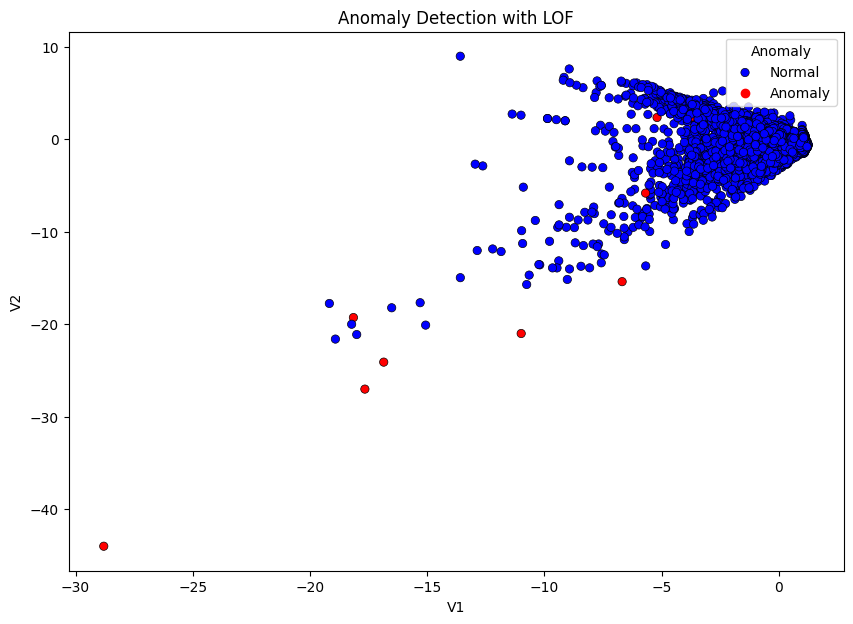

In [ ]:
#visualization
plt.figure(figsize=(10, 7))
y_pred_lof_invert = [-i for i in y_pred_lof]
sns.scatterplot(x=X_test1["V1"], y=X_test1["V2"], hue=y_pred_lof_invert, palette={0: 'blue', -1: 'red'}, edgecolor='black')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Anomaly Detection with LOF')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()


We can see from graph there are rare outliers(red) that has been detected, and the one that are red was incorrectly detected.

## **Novelty Detection: One-Class SVM**

In [ ]:
# For novelty detection, train on just the normal data
X_train_normal = X_train[y_train == 0]

# Fit model
clf = OneClassSVM(nu=0.001,gamma = 0.01)
clf.fit(X_train_normal)

# Predict anomalies
y_pred_clf = clf.predict(X_test)
y_pred_clf= [1 if pred == -1 else 0 for pred in y_pred_clf]

# Evaluate the model
print(classification_report(y_test, y_pred_clf))
print(confusion_matrix(y_test, y_pred_clf))
print('Accuracy is: {}%'.format(accuracy_score(y_test,y_pred_clf)*100))
print('AUC score is: {}%'.format(roc_auc_score(y_test, y_pred_clf)*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.30      0.63      0.41       101

    accuracy                           1.00     56962
   macro avg       0.65      0.82      0.70     56962
weighted avg       1.00      1.00      1.00     56962

[[56710   151]
 [   37    64]]
Accuracy is: 99.66995540886907%
AUC score is: 81.55038837979225%


True Positives: 56,705- Actual normal transactions predicted as normal.

False Positives: 156 - Actual normal transactions predicted as anomalous.

False Negatives: 36 - Actual anomalous transactions predicted as normal.

True Negatives: 65 - Actual anomalous transactions predicted as anomalous.

With 99.66% accuracy overrall with F1 score 40% on detecting anomaly.
This model performs great on detecting 65 out of 101 actual fraud cases.
AUC score of 81.55% indicates that the model has a good discriminatory power.

The challenge remains to further reduce false positives (normal transactions being flagged as fraud) and false negatives (actual frauds being missed)

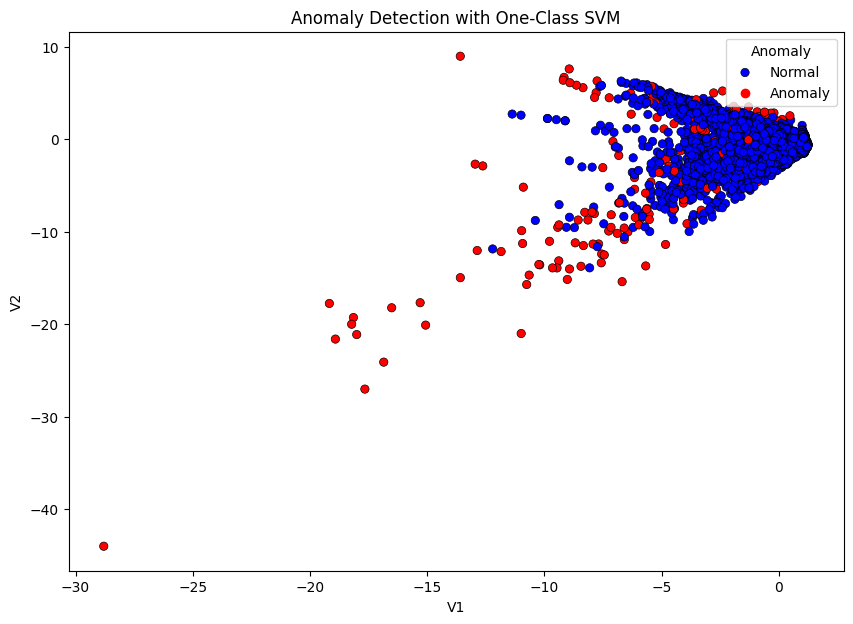

In [ ]:
plt.figure(figsize=(10, 7))
y_pred_clf_invert = [-i for i in y_pred_clf]
sns.scatterplot(x=X_test1["V1"], y=X_test1["V2"], hue=y_pred_clf_invert, palette={0: 'blue', -1: 'red'}, edgecolor='black')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Anomaly Detection with One-Class SVM')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

We can see lots of middle red dots(not outliers) from -10 to -20 are incorrectly detected.

## **Novelty Detection: Gaussian Mixture Model**

In [ ]:
# Assuming X_train contains your 'normal' data
X_train_normal = X_train[y_train == 0]
gmm = GaussianMixture(n_components=3)  # Here, we're assuming data can be modeled using 3 Gaussian distributions
gmm.fit(X_train_normal)

# For novelty detection:
log_prob = gmm.score_samples(X_test)

# Setting a threshold on log probabilities.
threshold = np.percentile(log_prob, 1)  # setting the threshold as the 1th percentile as 1% of test data would be flagged as novelties
y_pred_gmm = np.where(log_prob < threshold, 1, 0)

# Evaluate the model
print(classification_report(y_test, y_pred_gmm))
print(confusion_matrix(y_test, y_pred_gmm))
print('Accuracy is: {}%'.format(accuracy_score(y_test,y_pred_gmm)*100))
print('AUC score is: {}%'.format(roc_auc_score(y_test, y_pred_gmm)*100))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.15      0.84      0.25       101

    accuracy                           0.99     56962
   macro avg       0.57      0.92      0.62     56962
weighted avg       1.00      0.99      0.99     56962

[[56376   485]
 [   16    85]]
Accuracy is: 99.12046627576278%
AUC score is: 91.65272931506935%


True Positives: 56,376- Actual normal transactions predicted as normal.

False Positives: 485 - Actual normal transactions predicted as anomalous.

False Negatives: 16 - Actual anomalous transactions predicted as normal.

True Negatives: 85 - Actual anomalous transactions predicted as anomalous.

With 99.12% accuracy overrall with F1 score 25% on detecting anomaly.
The results indicate that while the GMM method is able to detect a majority of the frauds (high recall), it does so at the cost of a large number of false alarms (low precision) as shown graph below.

The AUC score of 91.65% is excellent and indicates that the Gaussian Mixture model has a strong ability to distinguish between fraudulent and non-fraudulent transactions

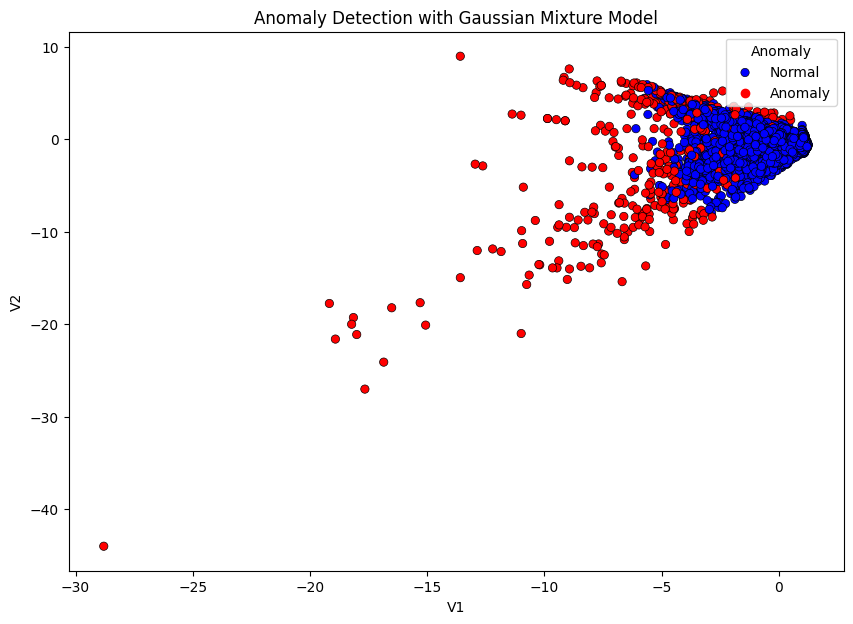

In [ ]:
plt.figure(figsize=(10, 7))
y_pred_gmm_invert = [-i for i in y_pred_gmm]
sns.scatterplot(x=X_test1["V1"], y=X_test1["V2"], hue=y_pred_gmm_invert, palette={0: 'blue', -1: 'red'}, edgecolor='black')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Anomaly Detection with Gaussian Mixture Model')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()


Too much red dots has been incorrectly detected(false alarms) compare to original graph confirmed low precision score.

## **Comparison**

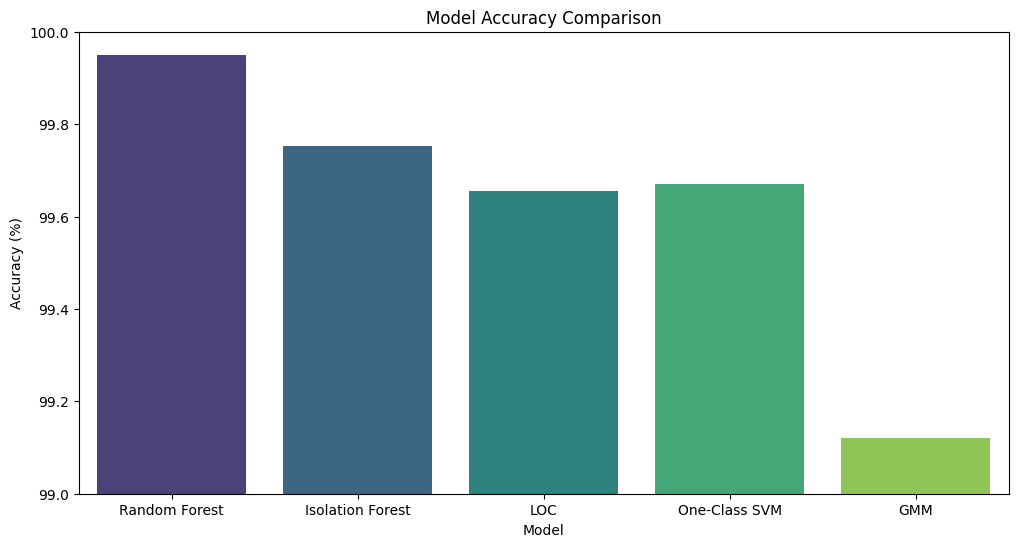

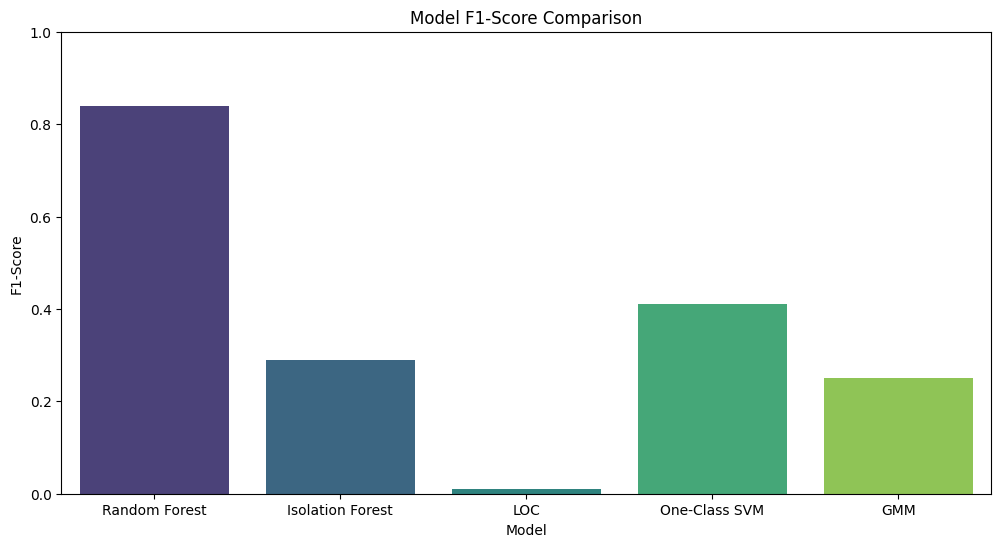

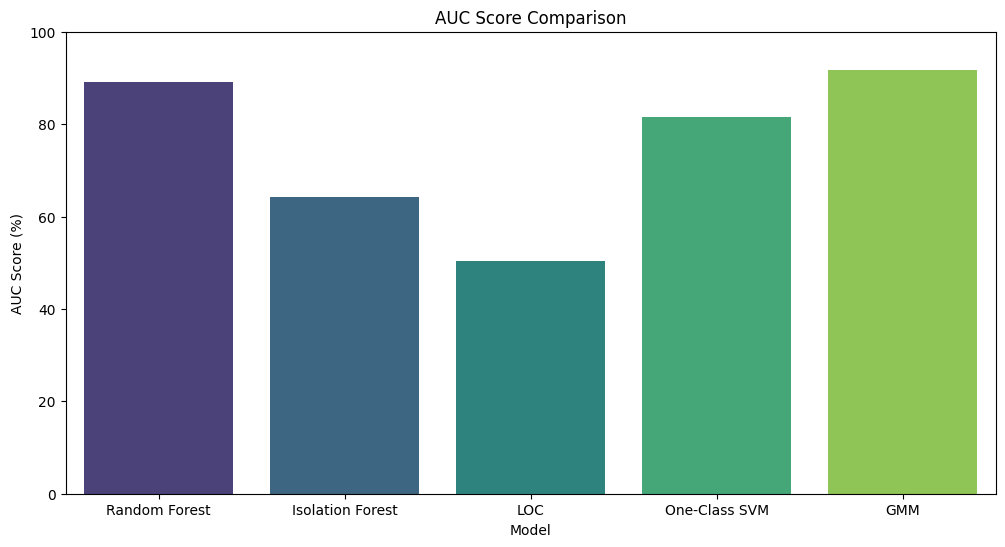

In [ ]:
# Data preparation
Comparison = {
    'Model': ['Random Forest', 'Isolation Forest', 'LOC', 'One-Class SVM', 'GMM'],
    'Accuracy': [99.94908886626172, 99.7524665566518, 99.65591095818264, 99.66995540886907, 99.12046627576278],
    'F1-Score': [0.84, 0.29, 0.01, 0.41, 0.25],
    'AUC-Score':[89.1027555297694,64.29576136769865,50.41063312113734,81.55038837979225,91.65272931506935]
}

data_comparison = pd.DataFrame(Comparison)

# Plotting
plt.figure(figsize=(12, 6))

# Accuracy Plot
sns.barplot(x='Model', y='Accuracy', data=data_comparison, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(99, 100)
plt.ylabel('Accuracy (%)')
plt.show()

# F1-Score Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1-Score', data=data_comparison, palette='viridis')
plt.title('Model F1-Score Comparison')
plt.ylim(0, 1)
plt.ylabel('F1-Score')
plt.show()

# AUC-score plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AUC-Score', data=data_comparison, palette='viridis')
plt.title('AUC Score Comparison')
plt.ylim(0, 100)
plt.ylabel('AUC Score (%)')
plt.show()

Best Model: Random Forest stands out competitive AUC of 89.10% and the highest accuracy of 99.95%, and best F1-score 0.84. The very low number of false positives means minimal inconvenience to customers from falsely flagged legitimate transactions.

Worst Model: Local Outlier Factor (LOF) has the lowest AUC of 50.41%, which is only marginally better than a random guess. With a high number of false negatives (100 out of 101 frauds missed) as evidenced in the confusion matrix, it's evident that LOF struggles to catch fraudulent transactions in this dataset.

